In [156]:
from datetime import datetime
import itertools

from data.base_dataset import *

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## BaseDataset

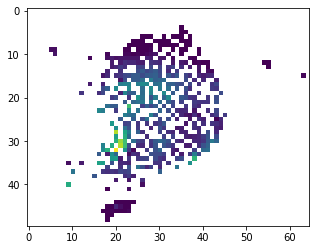

In [209]:
base_dataset = AwsBaseDatasetForGdapsKim(root_dir='/home/osilab12/ssd4')
aws = base_dataset.load_array(origin=datetime(2020, 7, 12, hour=18), lead_time=0)
aws[aws==-9999] = float("nan")
plt.imshow(aws[::-1])  # map of rain at 2020/07/01 10:00AM predicted at 0:00AM

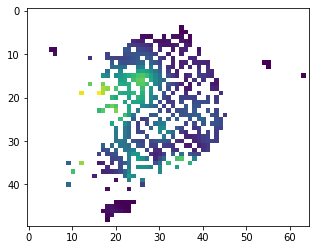

In [207]:
utc = 0
base_dataset = GdapsKimBaseDataset(root_dir='/home/osilab12/ssd4', variable_filter='rain, snow')
kim = base_dataset.load_array(origin=datetime(2020, 7, 12, hour=utc), lead_time=18)
kim = kim[0]
kim[np.isnan(aws)] = float("nan")
plt.imshow(kim[::-1])  # map of rain at 2020/07/01 10:00AM predicted at 0:00AM

## StandardDataset

In [ ]:
from data.dataset import Dataset, GdapsKimDataset

In [211]:
dataset = GdapsKimDataset(utc=0, window_size=3, root_dir="/data/nims",
                          date_intervals=[
                              (datetime(2020, 7, 1), datetime(2020, 7, 5)),
                              (datetime(2020, 7, 7), datetime(2020, 7, 14))
                          ])

Using total of 247 target timestamps


In [213]:
for x, y, timestamp in dataset:
    print(x.shape)
    print(y.shape)
    print(timestamp)
    break
    
for x, y, timestamp in itertools.islice(dataset, 5):
    print(timestamp)

(3, 12, 50, 65)
(50, 65)
tensor([2020,    7,    1,    0,    6])
tensor([2020,    7,    1,    0,    6])
tensor([2020,    7,    1,    0,    7])
tensor([2020,    7,    1,    0,    8])
tensor([2020,    7,    1,    0,    9])
tensor([2020,    7,    1,    0,   10])


In [221]:
from data.data_split import cyclic_split

In [222]:
train, val, test = cyclic_split(dataset, split_days=(4, 2, 2), cycle_start_delta=0)

In [172]:
for _, _, timestamp in itertools.islice(train, 10):
    print(timestamp)

tensor([2020,    7,    5,    0,    6])
tensor([2020,    7,    5,    0,    7])
tensor([2020,    7,    5,    0,    8])
tensor([2020,    7,    5,    0,    9])
tensor([2020,    7,    5,    0,   10])
tensor([2020,    7,    5,    0,   11])
tensor([2020,    7,    5,    0,   12])
tensor([2020,    7,    5,    0,   13])
tensor([2020,    7,    5,    0,   14])
tensor([2020,    7,    5,    0,   15])


In [173]:
for _, _, timestamp in itertools.islice(val, 10):
    print(timestamp)

tensor([2020,    7,    1,    0,    6])
tensor([2020,    7,    1,    0,    7])
tensor([2020,    7,    1,    0,    8])
tensor([2020,    7,    1,    0,    9])
tensor([2020,    7,    1,    0,   10])
tensor([2020,    7,    1,    0,   11])
tensor([2020,    7,    1,    0,   12])
tensor([2020,    7,    1,    0,   13])
tensor([2020,    7,    1,    0,   14])
tensor([2020,    7,    1,    0,   15])


In [174]:
for _, _, timestamp in itertools.islice(test, 10):
    print(timestamp)

tensor([2020,    7,    3,    0,    6])
tensor([2020,    7,    3,    0,    7])
tensor([2020,    7,    3,    0,    8])
tensor([2020,    7,    3,    0,    9])
tensor([2020,    7,    3,    0,   10])
tensor([2020,    7,    3,    0,   11])
tensor([2020,    7,    3,    0,   12])
tensor([2020,    7,    3,    0,   13])
tensor([2020,    7,    3,    0,   14])
tensor([2020,    7,    3,    0,   15])


In [150]:
len(ds), len(train), len(val), len(test)

(247, 95, 76, 76)